In [30]:
import numpy as np
from LibPython.Library import DiffEq

In [38]:
def junction(t, y, paramlist):
    dg, g = tuple(y)
    I, Ic0, Q = tuple(paramlist)
    dg = dg
    ddg = I/Ic0 - (1/Q)*dg - np.sin(g)
    return np.array([ddg, dg])    

In [39]:
tlist = np.arange(0, 100, 0.1)
paramlist = [1, 0.8, 1]
d = DiffEq(junction, tlist, [0.0, 0.0], paramlist)

In [40]:
y = d.runge_kutta()

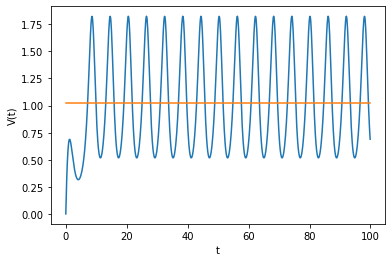

In [42]:
from matplotlib import pyplot as plt
plt.plot(tlist, y[:-1, 0])
plt.plot(tlist, np.ones_like(tlist)*np.average(y[:, 0]))
plt.xlabel("t")
plt.ylabel("V(t)")
plt.show()

In [43]:
start, stop = 0.5, 1.5
step = 1e-3
cycle = np.concatenate((np.arange(start, stop, step), np.flip(np.arange(start, stop, step))))

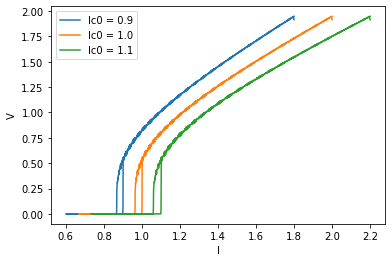

In [44]:
for Ic0 in np.arange(0.9, 1.1, 0.1):
    tlist = np.arange(0, 100, 0.1)
    vlist = []
    ilist = []
    Q = 1
    start = [0.0, 0.0]
    for alp in cycle:
        I = Ic0/alp
        paramlist = [I, Ic0, Q]
        d = DiffEq(junction, tlist, list(start), paramlist)
        y = d.runge_kutta()
        start = y[-1]
        v = np.average(y[:, 0])
        vlist.append(v)
        ilist.append(I)
    plt.plot(ilist, vlist, label=f"Ic0 = {Ic0}")
    
plt.xlabel("I")
plt.ylabel("V")
plt.legend()
plt.show()